<a href="https://colab.research.google.com/github/mayanainggolan/Analyze-Data-to-Answer-Question/blob/main/FP_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library
import pandas as pd

# load data
data = pd.read_csv('data.csv')
data.head()

,No,Kabupaten/Kota,Jumlah Kematian Bayi,Jumlah Posyandu Strata Pertama,Jumlah Posyandu Madya,Jumlah Posyandu Strata Purnama,Jumlah Posyandu Strata Mandiri,Jumlah Klinik KB (KKB),Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)
0,1,Pacitan,49,0,122,661,57,36,233
1,2,Ponorogo,106,0,84,985,64,50,515
2,3,Trenggalek,25,0,15,832,11,27,233
3,4,Tulungagung,108,0,58,1171,13,78,139
4,5,Kab. Blitar,85,3,73,1210,186,44,45


In [2]:
# struktur data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   No                                                    38 non-null     int64 
 1   Kabupaten/Kota                                        38 non-null     object
 2   Jumlah Kematian Bayi                                  38 non-null     int64 
 3   Jumlah Posyandu Strata Pertama                        38 non-null     int64 
 4   Jumlah Posyandu  Madya                                38 non-null     int64 
 5   Jumlah Posyandu Strata Purnama                        38 non-null     int64 
 6   Jumlah Posyandu Strata Mandiri                        38 non-null     int64 
 7   Jumlah Klinik KB (KKB)                                38 non-null     int64 
 8   Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)  38 non-null     int

In [3]:
# stat des
data.describe()

,No,Jumlah Kematian Bayi,Jumlah Posyandu Strata Pertama,Jumlah Posyandu Madya,Jumlah Posyandu Strata Purnama,Jumlah Posyandu Strata Mandiri,Jumlah Klinik KB (KKB),Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,19.500000,83.447368,9.789474,174.684211,958.342105,96.210526,55.289474,180.684211
std,11.113055,59.140098,22.267608,187.537399,565.414857,91.711993,27.874146,163.177255
min,1.000000,2.000000,0.000000,0.000000,128.000000,9.000000,17.000000,0.000000
25%,10.250000,48.250000,0.000000,54.250000,600.250000,29.000000,33.750000,28.000000
50%,19.500000,75.000000,0.000000,114.500000,948.000000,64.000000,52.000000,169.500000
75%,28.750000,116.250000,6.500000,236.500000,1246.000000,115.750000,65.250000,308.250000
max,38.000000,282.000000,123.000000,742.000000,2410.000000,348.000000,143.000000,623.000000


In [4]:
# cek missing values
data.isnull().sum()

No                                                      0
Kabupaten/Kota                                          0
Jumlah Kematian Bayi                                    0
Jumlah Posyandu Strata Pertama                          0
Jumlah Posyandu  Madya                                  0
Jumlah Posyandu Strata Purnama                          0
Jumlah Posyandu Strata Mandiri                          0
Jumlah Klinik KB (KKB)                                  0
Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)    0
dtype: int64

In [5]:
# deteksi outlier
#  metode interquartile range (IQR) untuk mendeteksi outlier
Q1 = data['Jumlah Kematian Bayi'].quantile(0.25)
Q3 = data['Jumlah Kematian Bayi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# menyaring outlier
data_no_outlier = data[(data['Jumlah Kematian Bayi'] >= lower_bound) & (data['Jumlah Kematian Bayi'] <= upper_bound)]

# pmbersihan data dan seleksi fitur
y = data_no_outlier['Jumlah Kematian Bayi']
X = data_no_outlier[['Jumlah Posyandu Strata Pertama', 'Jumlah Posyandu  Madya', 'Jumlah Posyandu Strata Purnama', 'Jumlah Posyandu Strata Mandiri',
                     'Jumlah Klinik KB (KKB)', 'Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)']]

In [6]:
# hapus kolom yang tidak diperlukan
data.drop(columns=['No'], inplace=True)

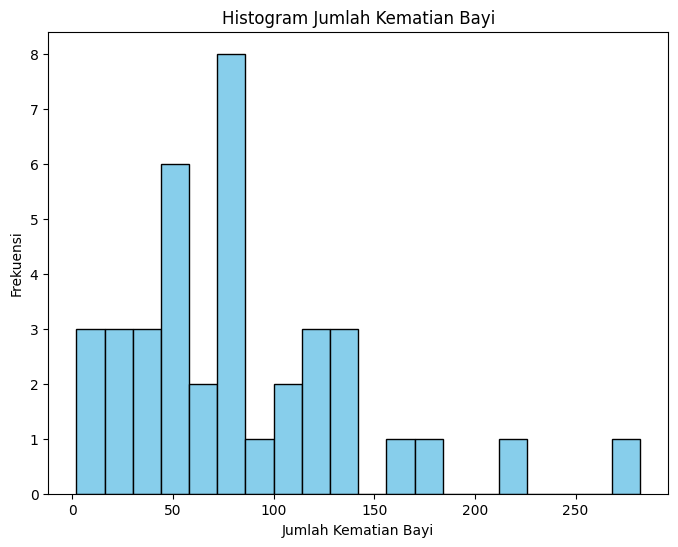

In [7]:
import matplotlib.pyplot as plt

# visualisasi histogram jumlah kematian bayi
plt.figure(figsize=(8, 6))
plt.hist(data['Jumlah Kematian Bayi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Jumlah Kematian Bayi')
plt.xlabel('Jumlah Kematian Bayi')
plt.ylabel('Frekuensi')
plt.show()

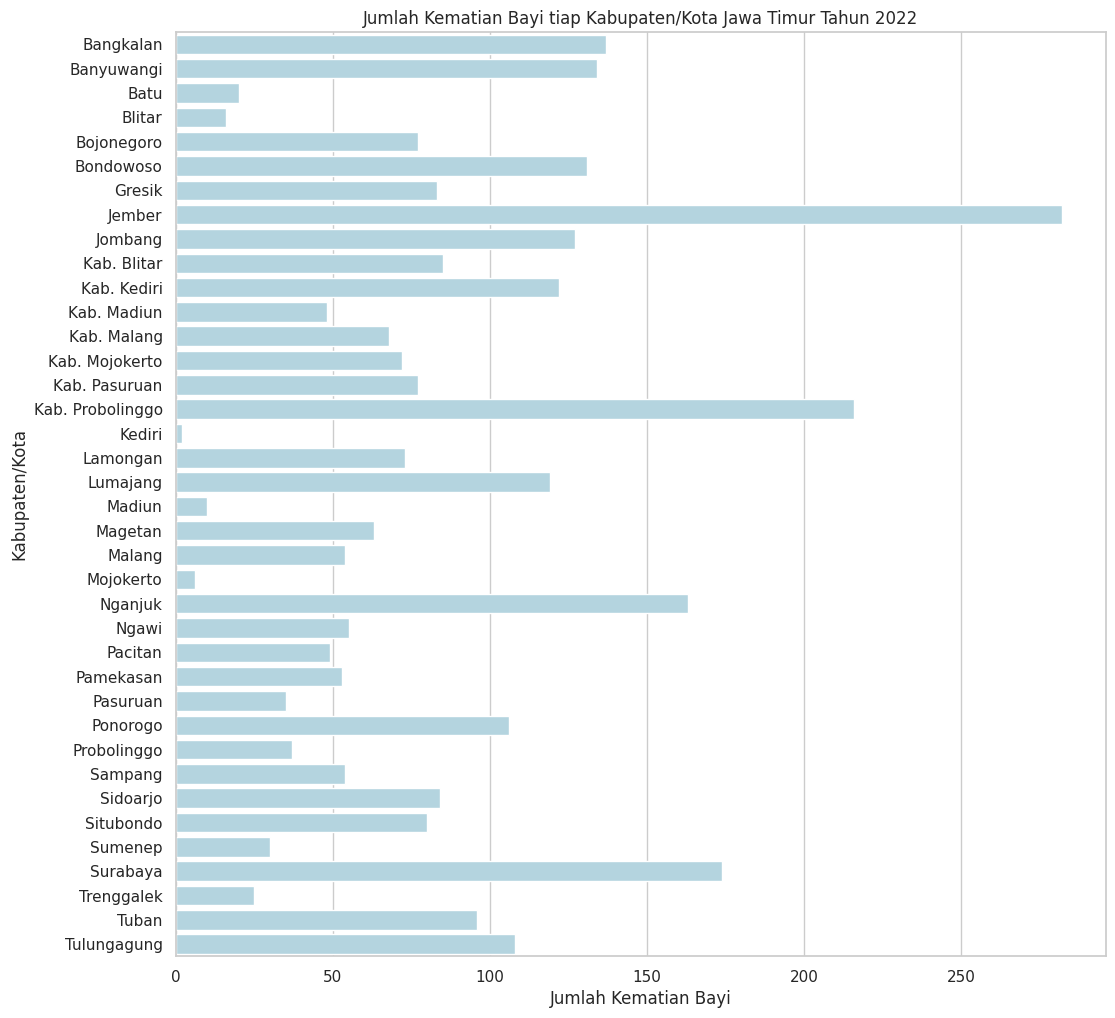

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# kolom-kolom yang ingin ditampilkan dalam stacked bar plot
kolom_kabupaten = 'Kabupaten/Kota'
kolom_kematian_bayi = 'Jumlah Kematian Bayi'

# mengelompokkan data berdasarkan kabupaten/kota dan menghitung jumlah kematian bayi
data_grouped = data.groupby(kolom_kabupaten)[kolom_kematian_bayi].sum().reset_index()

# membuat stacked bar plot
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
sns.barplot(x=kolom_kematian_bayi, y=kolom_kabupaten, data=data_grouped, color='lightblue')

# menambahkan label dan judul
plt.title('Jumlah Kematian Bayi tiap Kabupaten/Kota Jawa Timur Tahun 2022')
plt.xlabel('Jumlah Kematian Bayi')
plt.ylabel('Kabupaten/Kota')

# menampilkan plot
plt.show()



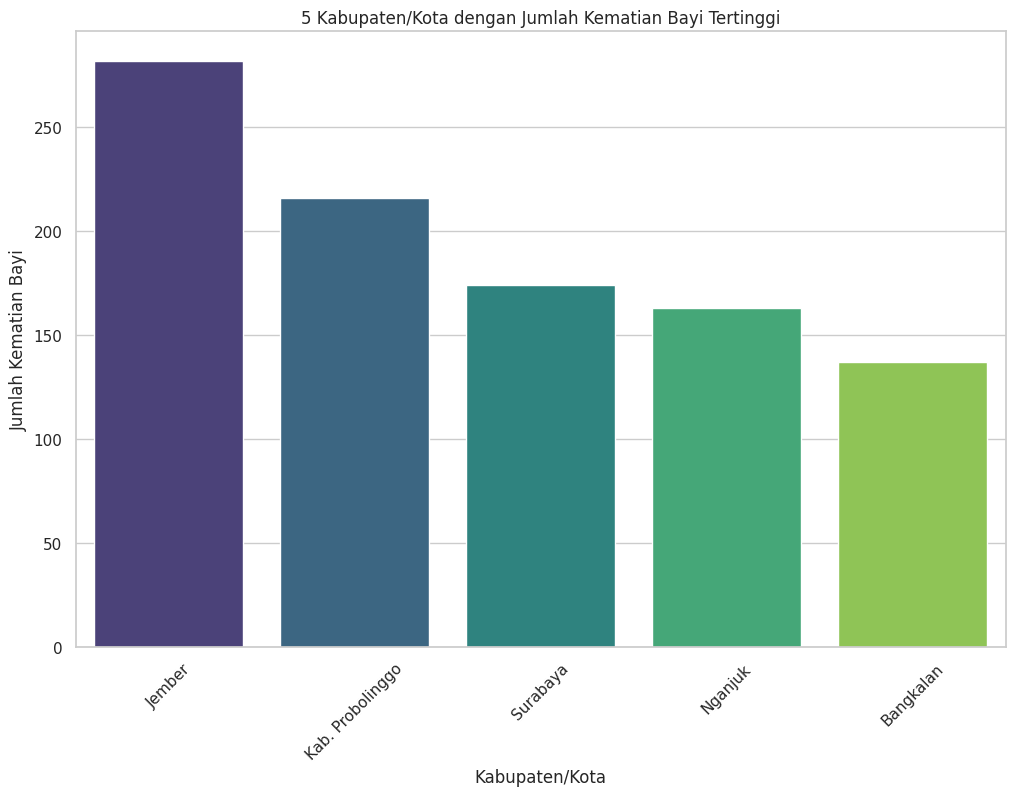

In [9]:

# visualisasi Bar Plot 10 Kabupaten/Kota dengan Jumlah Kematian Bayi Tertinggi
# mengurutkan data berdasarkan jumlah kematian bayi secara descending
top_kabupaten = data.sort_values(by='Jumlah Kematian Bayi', ascending=False).head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_kabupaten['Kabupaten/Kota'], y=top_kabupaten['Jumlah Kematian Bayi'], palette='viridis')
plt.title('5 Kabupaten/Kota dengan Jumlah Kematian Bayi Tertinggi')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Kematian Bayi')
plt.xticks(rotation=45)
plt.show()

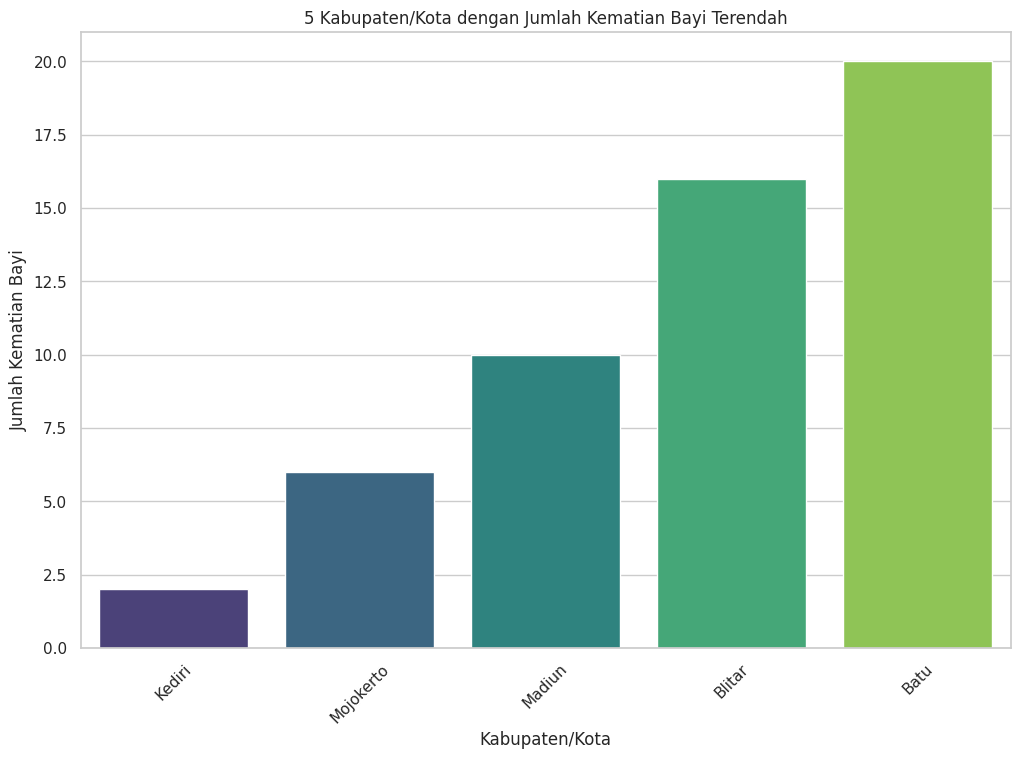

In [10]:
# mengurutkan data berdasarkan jumlah kematian bayi secara ascending (dari rendah ke tinggi)
bottom_kabupaten = data.sort_values(by='Jumlah Kematian Bayi', ascending=True).head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x=bottom_kabupaten['Kabupaten/Kota'], y=bottom_kabupaten['Jumlah Kematian Bayi'], palette='viridis')
plt.title('5 Kabupaten/Kota dengan Jumlah Kematian Bayi Terendah')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Kematian Bayi')
plt.xticks(rotation=45)
plt.show()


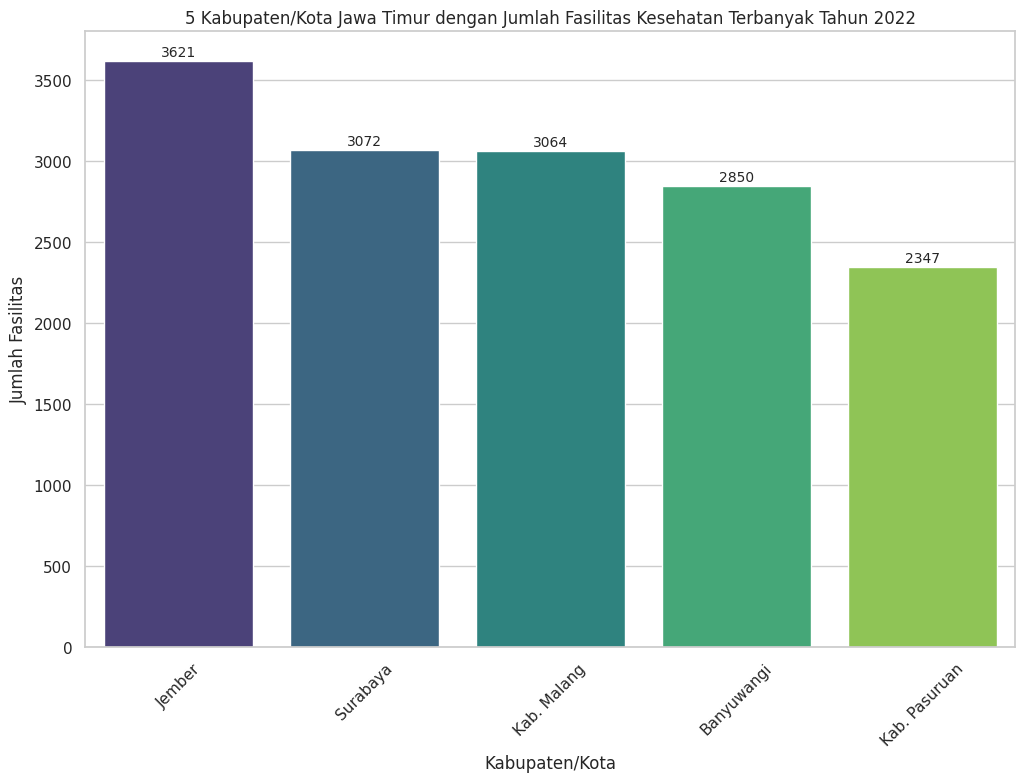

In [11]:
# memilih kolom-kolom fasilitas kesehatan
fasilitas_columns = [col for col in data.columns if 'Jumlah' in col]

# mengagregasi data berdasarkan kabupaten/kota
total_fasilitas_kabupaten = data.groupby('Kabupaten/Kota')[fasilitas_columns].sum()

# menambahkan kolom 'Total Fasilitas' yang merupakan jumlah dari semua fasilitas kesehatan
total_fasilitas_kabupaten['Total Fasilitas'] = total_fasilitas_kabupaten.sum(axis=1)

# mengurutkan data berdasarkan total fasilitas secara descending
top_kabupaten = total_fasilitas_kabupaten.sort_values(by='Total Fasilitas', ascending=False).head(5)

# visualisasi Bar Plot 5 Kabupaten/Kota dengan Jumlah Fasilitas Kesehatan Terbanyak
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_kabupaten.index, y=top_kabupaten['Total Fasilitas'], palette='viridis')

# menambahkan nilai jumlah pada setiap bar
for index, value in enumerate(top_kabupaten['Total Fasilitas']):
    bar_plot.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.title('5 Kabupaten/Kota Jawa Timur dengan Jumlah Fasilitas Kesehatan Terbanyak Tahun 2022')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Fasilitas')
plt.xticks(rotation=45)
plt.show()

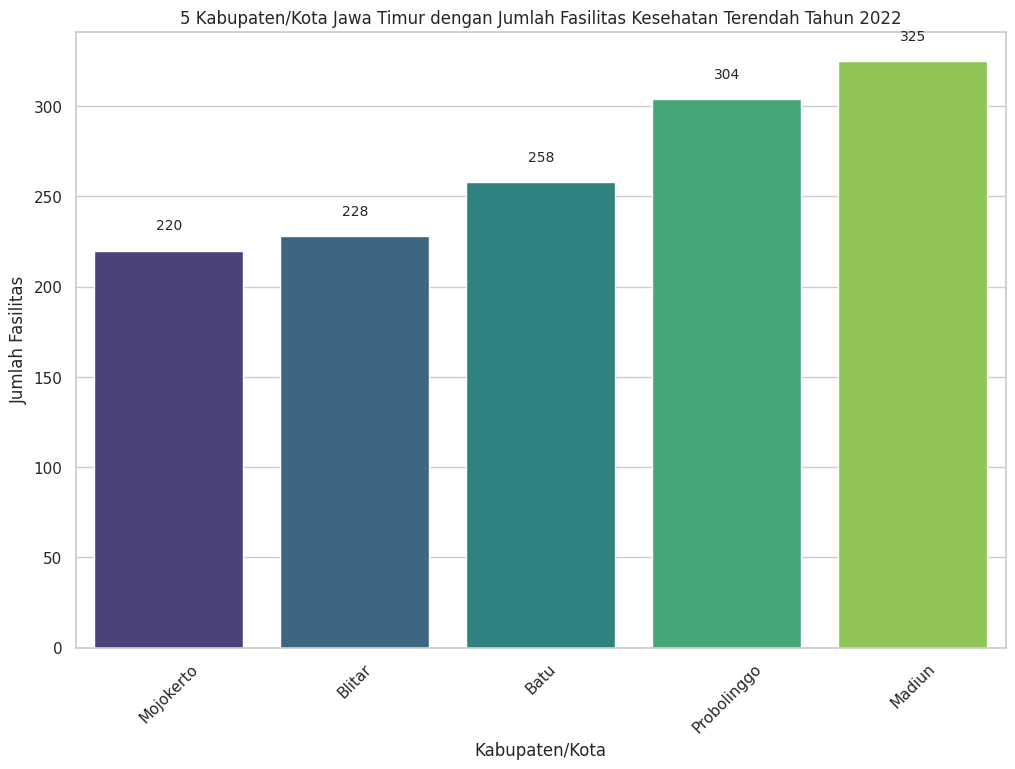

In [12]:
# memilih kolom-kolom fasilitas kesehatan
fasilitas_columns = [col for col in data.columns if 'Jumlah' in col]

# mengagregasi data berdasarkan kabupaten/kota
total_fasilitas_kabupaten = data.groupby('Kabupaten/Kota')[fasilitas_columns].sum()

# menambahkan kolom 'Total Fasilitas' yang merupakan jumlah dari semua fasilitas kesehatan
total_fasilitas_kabupaten['Total Fasilitas'] = total_fasilitas_kabupaten.sum(axis=1)

# mengurutkan data berdasarkan total fasilitas secara descending
top_kabupaten = total_fasilitas_kabupaten.sort_values(by='Total Fasilitas', ascending=True).head(5)

# visualisasi Bar Plot 5 Kabupaten/Kota dengan Jumlah Fasilitas Kesehatan Terbanyak
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_kabupaten.index, y=top_kabupaten['Total Fasilitas'], palette='viridis')

# menambahkan nilai jumlah pada setiap bar
for index, value in enumerate(top_kabupaten['Total Fasilitas']):
    bar_plot.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.title('5 Kabupaten/Kota Jawa Timur dengan Jumlah Fasilitas Kesehatan Terendah Tahun 2022')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Fasilitas')
plt.xticks(rotation=45)
plt.show()

In [13]:
print(data.columns)

Index(['Kabupaten/Kota', 'Jumlah Kematian Bayi',
       'Jumlah Posyandu Strata Pertama', 'Jumlah Posyandu  Madya',
       'Jumlah Posyandu Strata Purnama', 'Jumlah Posyandu Strata Mandiri',
       'Jumlah Klinik KB (KKB)',
       'Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)'],
      dtype='object')


In [14]:
# membangun model regresi
import statsmodels.api as sm

# memilih kolom-kolom fasilitas kesehatan
fasilitas_columns = [col for col in data.columns if 'Jumlah' in col]

# mengagregasi data berdasarkan kabupaten/kota
total_fasilitas_kabupaten = data.groupby('Kabupaten/Kota')[fasilitas_columns].sum()

# menambahkan kolom 'Total Fasilitas' yang merupakan jumlah dari semua fasilitas kesehatan
total_fasilitas_kabupaten['Total Fasilitas'] = total_fasilitas_kabupaten.sum(axis=1)

# variabel independen (X) adalah 'Total Fasilitas Kesehatan'
X = total_fasilitas_kabupaten['Total Fasilitas']

# variabel dependen (Y) adalah 'Jumlah Kematian Bayi'
Y = total_fasilitas_kabupaten['Jumlah Kematian Bayi']

# menambahkan konstanta ke variabel independen (X)
X = sm.add_constant(X)

# membuat model regresi linier OLS
model = sm.OLS(Y, X).fit()

# menampilkan hasil regresi
print(model.summary())

# note
# untuk variabel x nya mending di pisah, supaya nnt bisa


                             OLS Regression Results                             
Dep. Variable:     Jumlah Kematian Bayi   R-squared:                       0.552
Model:                              OLS   Adj. R-squared:                  0.540
Method:                   Least Squares   F-statistic:                     44.42
Date:                  Thu, 14 Dec 2023   Prob (F-statistic):           9.07e-08
Time:                          23:01:19   Log-Likelihood:                -193.18
No. Observations:                    38   AIC:                             390.4
Df Residuals:                        36   BIC:                             393.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.

In [15]:
print(data.columns)

Index(['Kabupaten/Kota', 'Jumlah Kematian Bayi',
       'Jumlah Posyandu Strata Pertama', 'Jumlah Posyandu  Madya',
       'Jumlah Posyandu Strata Purnama', 'Jumlah Posyandu Strata Mandiri',
       'Jumlah Klinik KB (KKB)',
       'Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)'],
      dtype='object')


In [16]:
import statsmodels.api as sm

# variabel independen (X) adalah 'Total Fasilitas Kesehatan'
X_columns = ['Jumlah Posyandu Strata Pertama', 'Jumlah Posyandu  Madya', 'Jumlah Posyandu Strata Purnama', 'Jumlah Posyandu Strata Mandiri', 'Jumlah Klinik KB (KKB)', 'Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)']
X = data[X_columns]

# variabel dependen (Y) adalah 'Jumlah Kematian Bayi'
Y = data['Jumlah Kematian Bayi']

# menambahkan konstanta ke variabel independen (X)
X = sm.add_constant(X)

# membuat model regresi linier OLS
model = sm.OLS(Y, X).fit()

# menampilkan hasil regresi
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Jumlah Kematian Bayi   R-squared:                       0.577
Model:                              OLS   Adj. R-squared:                  0.496
Method:                   Least Squares   F-statistic:                     7.060
Date:                  Thu, 14 Dec 2023   Prob (F-statistic):           8.37e-05
Time:                          23:01:19   Log-Likelihood:                -192.08
No. Observations:                    38   AIC:                             398.2
Df Residuals:                        31   BIC:                             409.6
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [ ]:
# uji asumsi klasik metode regresi
from scipy.stats import shapiro

residuals = model.resid
# Melakukan uji normalitas dengan Shapiro-Wilk
shapiro_test = shapiro(residuals)
print(shapiro_test)

# Membuat residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menghitung VIF untuk masing-masing variabel independen
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Menampilkan hasil VIF
print(vif_data)

from statsmodels.stats.diagnostic import het_white
from scipy import stats
import statsmodels.api as sm

residuals = model.resid

# Uji Normalitas Residuals
normality_test = stats.shapiro(residuals)
print(f'Statistik uji normalitas: {normality_test.statistic}, P-value: {normality_test.pvalue}')

# Visualisasi Normalitas Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, stat='density', color='blue', bins=30)
plt.title('Histogram Residuals dan Kurva Normal')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


# Melakukan uji White untuk heteroskedastisitas
white_test = het_white(residuals, X)
print(white_test)

# Uji Heteroskedastisitas (Breusch-Pagan Test)
het_test = sm.stats.diagnostic.het_breuschpagan(residuals, X)
print(f'Statistik uji heteroskedastisitas: {het_test[0]}, P-value: {het_test[1]}')


In [17]:
# regresi logistik

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pilih variabel independen (X) dan variabel dependen (Y)
X_columns = ['Jumlah Posyandu Strata Pertama', 'Jumlah Posyandu  Madya', 'Jumlah Posyandu Strata Purnama', 'Jumlah Posyandu Strata Mandiri', 'Jumlah Klinik KB (KKB)', 'Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)']
X = data[X_columns]
Y = data['Jumlah Kematian Bayi']

# Pisahkan data menjadi set pelatihan dan set pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inisialisasi model Logistic Regression
model = LogisticRegression()

# Latih model dengan set pelatihan
model.fit(X_train, Y_train)

# Lakukan prediksi dengan set pengujian
Y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Tampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.0
Confusion Matrix:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       0.0
          35       0.00      0.00      0.00       1.0
          53       0.00      0.00      0.00       1.0
          54       0.00      0.00      0.00       1.0
          68  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

In [35]:
# metode knn 3 kategori kematian bayi

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tambahkan kolom target kategori tingkat kematian bayi
data['Kategori Kematian Bayi'] = pd.cut(data['Jumlah Kematian Bayi'], bins=[-float('inf'), 10, 30, float('inf')], labels=['rendah', 'sedang', 'tinggi'])

# Pilih variabel independen (X) dan variabel target (Y)
X_columns = ['Jumlah Posyandu Strata Pertama', 'Jumlah Posyandu  Madya', 'Jumlah Posyandu Strata Purnama', 'Jumlah Posyandu Strata Mandiri', 'Jumlah Klinik KB (KKB)', 'Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)']
X = data[X_columns]
Y = data['Kategori Kematian Bayi']

# Resampling dengan oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)

# Pisahkan data resampled menjadi set pelatihan dan set pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Inisialisasi model K-Nearest Neighbors dengan k=3 (bisa disesuaikan)
model = KNeighborsClassifier(n_neighbors=3)

# Latih model dengan set pelatihan
model.fit(X_train, Y_train)

# Lakukan prediksi dengan set pengujian
Y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Tampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8421052631578947
Confusion Matrix:
 [[7 0 0]
 [0 5 0]
 [0 3 4]]
Classification Report:
               precision    recall  f1-score   support

      rendah       1.00      1.00      1.00         7
      sedang       0.62      1.00      0.77         5
      tinggi       1.00      0.57      0.73         7

    accuracy                           0.84        19
   macro avg       0.88      0.86      0.83        19
weighted avg       0.90      0.84      0.84        19



In [21]:
# metode knn 4 kategori kematian bayi

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tambahkan kolom target kategori tingkat kematian bayi berdasarkan nilai normatif AKB
data['Kategori Kematian Bayi'] = pd.cut(data['Jumlah Kematian Bayi'], bins=[-float('inf'), 20, 40, 70, float('inf')], labels=['rendah', 'sedang', 'tinggi', 'sangat_tinggi'])

# Pilih variabel independen (X) dan variabel target (Y)
X_columns = ['Jumlah Posyandu Strata Pertama', 'Jumlah Posyandu  Madya', 'Jumlah Posyandu Strata Purnama', 'Jumlah Posyandu Strata Mandiri', 'Jumlah Klinik KB (KKB)', 'Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)']
X = data[X_columns]
Y = data['Kategori Kematian Bayi']

# Resampling dengan oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)

# Pisahkan data resampled menjadi set pelatihan dan set pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Inisialisasi model K-Nearest Neighbors dengan k=3 (bisa disesuaikan)
model = KNeighborsClassifier(n_neighbors=3)

# Latih model dengan set pelatihan
model.fit(X_train, Y_train)

# Lakukan prediksi dengan set pengujian
Y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)


# Tampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



Accuracy: 0.9411764705882353
Confusion Matrix:
 [[3 0 0 0]
 [0 3 0 1]
 [0 0 6 0]
 [0 0 0 4]]
Classification Report:
                precision    recall  f1-score   support

       rendah       1.00      1.00      1.00         3
sangat_tinggi       1.00      0.75      0.86         4
       sedang       1.00      1.00      1.00         6
       tinggi       0.80      1.00      0.89         4

     accuracy                           0.94        17
    macro avg       0.95      0.94      0.94        17
 weighted avg       0.95      0.94      0.94        17



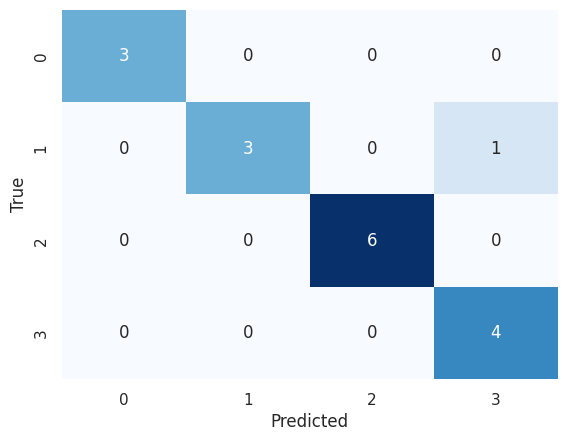

In [22]:

# Visualisasi Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
# prediksi dengan metode knn 4 kategori kematian bayi

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tambahkan kolom target kategori tingkat kematian bayi berdasarkan nilai normatif AKB
data['Kategori Kematian Bayi'] = pd.cut(data['Jumlah Kematian Bayi'], bins=[-float('inf'), 20, 40, 70, float('inf')], labels=['rendah', 'sedang', 'tinggi', 'sangat_tinggi'])

# Pilih variabel independen (X) dan variabel target (Y)
X_columns = ['Jumlah Posyandu Strata Pertama', 'Jumlah Posyandu  Madya', 'Jumlah Posyandu Strata Purnama', 'Jumlah Posyandu Strata Mandiri', 'Jumlah Klinik KB (KKB)', 'Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)']
X = data[X_columns]
Y = data['Kategori Kematian Bayi']

# Resampling dengan oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)

# Pisahkan data resampled menjadi set pelatihan dan set pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Inisialisasi model K-Nearest Neighbors dengan k=3 (bisa disesuaikan)
model = KNeighborsClassifier(n_neighbors=3)

# Latih model dengan set pelatihan
model.fit(X_train, Y_train)

# Reset indeks pada X_test
X_test_reset_index = X_test.reset_index(drop=True)

# Lakukan prediksi dengan set pengujian
Y_pred = model.predict(X_test_reset_index)

# Tambahkan kolom 'Kategori Prediksi' ke dalam data untuk set pengujian
data.loc[X_test_reset_index.index, 'Kategori Prediksi'] = Y_pred

# Tampilkan hasil klasifikasi tiap kabupaten/kota
result_df_test = data[['Kabupaten/Kota', 'Kategori Kematian Bayi', 'Kategori Prediksi']]
print(result_df_test)



      Kabupaten/Kota Kategori Kematian Bayi Kategori Prediksi
0            Pacitan                 tinggi            tinggi
1           Ponorogo          sangat_tinggi            tinggi
2         Trenggalek                 sedang            sedang
3        Tulungagung          sangat_tinggi     sangat_tinggi
4        Kab. Blitar          sangat_tinggi     sangat_tinggi
5        Kab. Kediri          sangat_tinggi            sedang
6        Kab. Malang                 tinggi            tinggi
7           Lumajang          sangat_tinggi            tinggi
8             Jember          sangat_tinggi     sangat_tinggi
9         Banyuwangi          sangat_tinggi            sedang
10         Bondowoso          sangat_tinggi            rendah
11         Situbondo          sangat_tinggi            rendah
12  Kab. Probolinggo          sangat_tinggi            rendah
13     Kab. Pasuruan          sangat_tinggi            tinggi
14          Sidoarjo          sangat_tinggi            sedang
15    Ka

In [36]:
# Lakukan cross-validation dengan 5-fold
cv_scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')

# Tampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Scores: [1.         0.75       0.75       0.75       0.75       0.75
 0.75       1.         1.         0.33333333]
Mean Accuracy: 0.7833333333333333


In [37]:
# coba metode random forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tambahkan kolom target kategori tingkat kematian bayi berdasarkan nilai normatif AKB
data['Kategori Kematian Bayi'] = pd.cut(data['Jumlah Kematian Bayi'], bins=[-float('inf'), 20, 40, 70, float('inf')], labels=['rendah', 'sedang', 'tinggi', 'sangat_tinggi'])

# Pilih variabel independen (X) dan variabel target (Y)
X_columns = ['Jumlah Posyandu Strata Pertama', 'Jumlah Posyandu  Madya', 'Jumlah Posyandu Strata Purnama', 'Jumlah Posyandu Strata Mandiri', 'Jumlah Klinik KB (KKB)', 'Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)']
X = data[X_columns]
Y = data['Kategori Kematian Bayi']

# Pisahkan data menjadi set pelatihan dan set pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest dengan n_estimators=100 (bisa disesuaikan)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan set pelatihan
model.fit(X_train, Y_train)

# Lakukan prediksi dengan set pengujian
Y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Tampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.5
Confusion Matrix:
 [[1 0 0 0]
 [0 3 0 0]
 [1 0 0 0]
 [0 3 0 0]]
Classification Report:
                precision    recall  f1-score   support

       rendah       0.50      1.00      0.67         1
sangat_tinggi       0.50      1.00      0.67         3
       sedang       0.00      0.00      0.00         1
       tinggi       0.00      0.00      0.00         3

     accuracy                           0.50         8
    macro avg       0.25      0.50      0.33         8
 weighted avg       0.25      0.50      0.33         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# coba metode naive bayes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tambahkan kolom target kategori tingkat kematian bayi berdasarkan nilai normatif AKB
data['Kategori Kematian Bayi'] = pd.cut(data['Jumlah Kematian Bayi'], bins=[-float('inf'), 20, 40, 70, float('inf')], labels=['rendah', 'sedang', 'tinggi', 'sangat_tinggi'])

# Pilih variabel independen (X) dan variabel target (Y)
X_columns = ['Jumlah Posyandu Strata Pertama', 'Jumlah Posyandu  Madya', 'Jumlah Posyandu Strata Purnama', 'Jumlah Posyandu Strata Mandiri', 'Jumlah Klinik KB (KKB)', 'Jumlah Pos Pelayanan Keluarga Berencana Desa (PPKBD)']
X = data[X_columns]
Y = data['Kategori Kematian Bayi']

# Pisahkan data menjadi set pelatihan dan set pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
model = GaussianNB()

# Latih model dengan set pelatihan
model.fit(X_train, Y_train)

# Lakukan prediksi dengan set pengujian
Y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Tampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.5
Confusion Matrix:
 [[1 0 0 0]
 [0 3 0 0]
 [1 0 0 0]
 [0 1 2 0]]
Classification Report:
                precision    recall  f1-score   support

       rendah       0.50      1.00      0.67         1
sangat_tinggi       0.75      1.00      0.86         3
       sedang       0.00      0.00      0.00         1
       tinggi       0.00      0.00      0.00         3

     accuracy                           0.50         8
    macro avg       0.31      0.50      0.38         8
 weighted avg       0.34      0.50      0.40         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Tampilkan jumlah data asli tiap kategori
jumlah_data_asli = data['Kategori Kematian Bayi'].value_counts()

# Tampilkan hasil
print("Jumlah Data Asli Tiap Kategori:")
print(jumlah_data_asli)


Jumlah Data Asli Tiap Kategori:
sangat_tinggi    21
tinggi            8
rendah            5
sedang            4
Name: Kategori Kematian Bayi, dtype: int64


In [32]:
import pandas as pd

# Tampilkan DataFrame berisi nama kabupaten/kota dan kategori kematian bayi
result_df = data[['Kabupaten/Kota', 'Kategori Kematian Bayi']]

# Tampilkan hasil
print(result_df)





      Kabupaten/Kota Kategori Kematian Bayi
0            Pacitan                 tinggi
1           Ponorogo          sangat_tinggi
2         Trenggalek                 sedang
3        Tulungagung          sangat_tinggi
4        Kab. Blitar          sangat_tinggi
5        Kab. Kediri          sangat_tinggi
6        Kab. Malang                 tinggi
7           Lumajang          sangat_tinggi
8             Jember          sangat_tinggi
9         Banyuwangi          sangat_tinggi
10         Bondowoso          sangat_tinggi
11         Situbondo          sangat_tinggi
12  Kab. Probolinggo          sangat_tinggi
13     Kab. Pasuruan          sangat_tinggi
14          Sidoarjo          sangat_tinggi
15    Kab. Mojokerto          sangat_tinggi
16           Jombang          sangat_tinggi
17           Nganjuk          sangat_tinggi
18       Kab. Madiun                 tinggi
19           Magetan                 tinggi
20             Ngawi                 tinggi
21        Bojonegoro          sa

In [40]:
# clustering

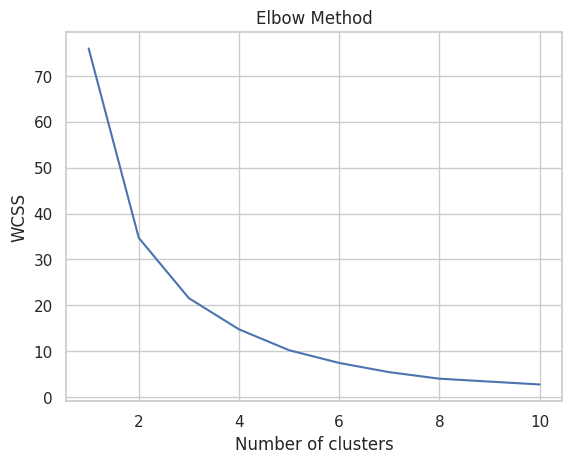

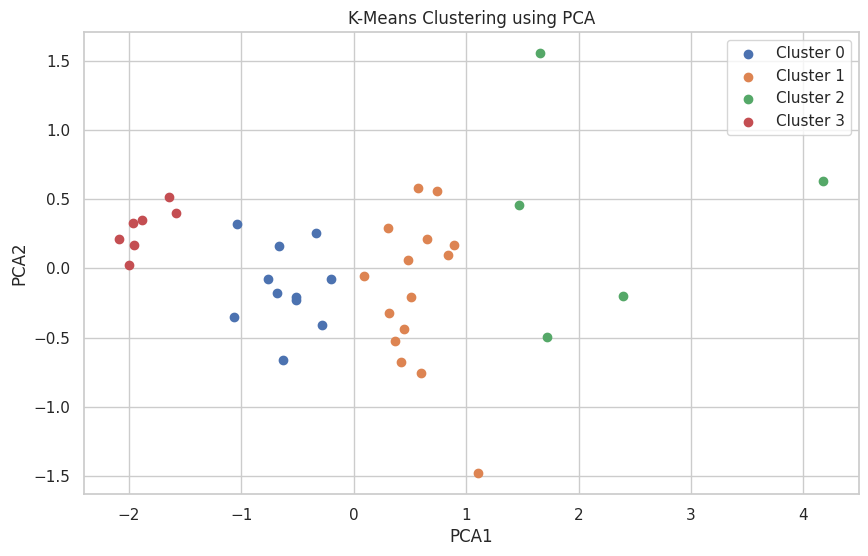

      Kabupaten/Kota  Jumlah Kematian Bayi  Total Fasilitas  Cluster
0            Pacitan                    49             1158        0
1           Ponorogo                   106             1804        1
2         Trenggalek                    25             1143        0
3        Tulungagung                   108             1567        1
4        Kab. Blitar                    85             1646        1
5        Kab. Kediri                   122             1992        1
6        Kab. Malang                    68             3064        1
7           Lumajang                   119             1814        1
8             Jember                   282             3621        2
9         Banyuwangi                   134             2850        2
10         Bondowoso                   131             1553        1
11         Situbondo                    80             1216        0
12  Kab. Probolinggo                   216             1619        2
13     Kab. Pasuruan              

In [39]:
# Langkah 1: Import library yang dibutuhkan
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Langkah 2: Gabungkan variabel fasilitas kesehatan dan hitung total
data['Total Fasilitas'] = data[fasilitas_columns].sum(axis=1)

# Langkah 3: Pilih variabel yang akan digunakan untuk clustering
selected_columns = ['Jumlah Kematian Bayi', 'Total Fasilitas']

# Langkah 4: Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_columns])

# Langkah 5: Pilih jumlah klaster (K) dengan metode Elbow
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Berdasarkan Elbow Method, pilih jumlah klaster (K)
# Misal, kita pilih K=3

# Langkah 6: Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Langkah 7: Visualisasi hasil clustering menggunakan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(data[data['Cluster'] == cluster]['PCA1'],
                data[data['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')

plt.title('K-Means Clustering using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Tampilkan hasil klaster
print(data[['Kabupaten/Kota', 'Jumlah Kematian Bayi', 'Total Fasilitas', 'Cluster']])


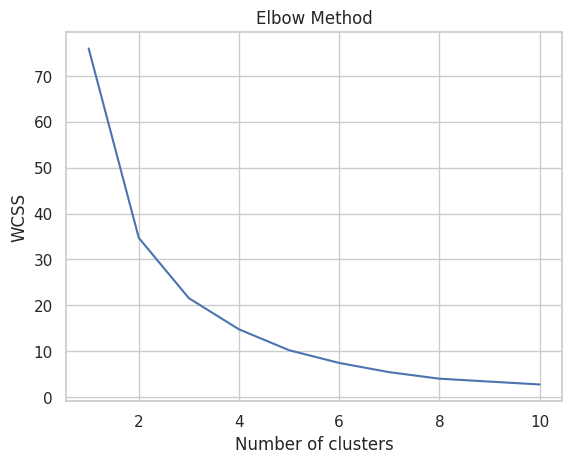

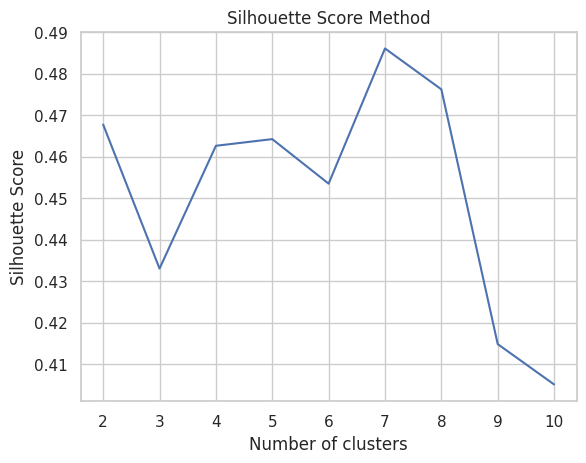

<ipython-input-41-e18dc0542a2b>:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats_final = data.groupby('Cluster').mean()


         Jumlah Kematian Bayi  Jumlah Posyandu Strata Pertama  \
Cluster                                                         
0                   53.000000                       10.727273   
1                   99.533333                       13.533333   
2                  193.800000                        8.600000   
3                   18.000000                        1.142857   

         Jumlah Posyandu  Madya  Jumlah Posyandu Strata Purnama  \
Cluster                                                           
0                    181.545455                      772.636364   
1                    210.600000                     1220.333333   
2                    263.400000                     1663.800000   
3                     23.571429                      184.857143   

         Jumlah Posyandu Strata Mandiri  Jumlah Klinik KB (KKB)  \
Cluster                                                           
0                             48.090909               45.909091   
1    

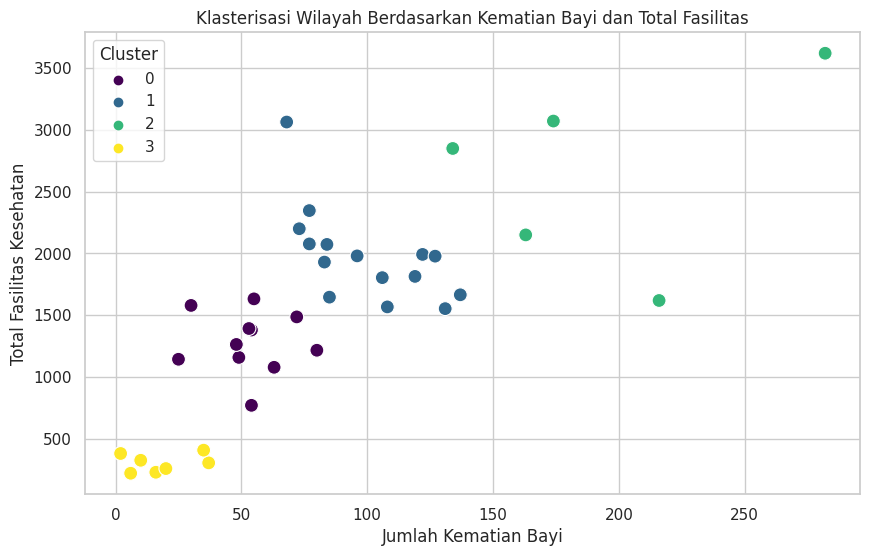

      Kabupaten/Kota  Jumlah Kematian Bayi  Total Fasilitas  Cluster
0            Pacitan                    49             1158        0
1           Ponorogo                   106             1804        1
2         Trenggalek                    25             1143        0
3        Tulungagung                   108             1567        1
4        Kab. Blitar                    85             1646        1
5        Kab. Kediri                   122             1992        1
6        Kab. Malang                    68             3064        1
7           Lumajang                   119             1814        1
8             Jember                   282             3621        2
9         Banyuwangi                   134             2850        2
10         Bondowoso                   131             1553        1
11         Situbondo                    80             1216        0
12  Kab. Probolinggo                   216             1619        2
13     Kab. Pasuruan              

In [41]:
# Langkah 1: Melakukan import library yang dibutuhkan
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Langkah 2: Menggabungkan variabel fasilitas kesehatan menjadi 1 variabel "Total Fasilitas"
data['Total Fasilitas'] = data[fasilitas_columns].sum(axis=1)

# Langkah 3: Memilih variabel yang akan digunakan untuk clustering
selected_columns = ['Jumlah Kematian Bayi', 'Total Fasilitas']

# Langkah 4: Melakukan normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_columns])

# Langkah 5: Memilih jumlah klaster (K) dengan metode Elbow
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

from sklearn.metrics import silhouette_score

# Memilih jumlah klaster (K) dengan metode Silhouette Score
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualisasi Silhouette Score
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Langkah 6: Melakukan klastering menggunakan K-Means
kmeans_final = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels_final = kmeans_final.fit_predict(scaled_data)

# Menambahkan kolom klaster ke data
data['Cluster'] = cluster_labels_final

# Statistik klaster
cluster_stats_final = data.groupby('Cluster').mean()
print(cluster_stats_final)

# Visualisasi Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jumlah Kematian Bayi', y='Total Fasilitas', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Klasterisasi Wilayah Berdasarkan Kematian Bayi dan Total Fasilitas')
plt.xlabel('Jumlah Kematian Bayi')
plt.ylabel('Total Fasilitas Kesehatan')
plt.show()

# Menampilkan informasi klaster untuk setiap kabupaten
cluster_info = data[['Kabupaten/Kota', 'Jumlah Kematian Bayi', 'Total Fasilitas', 'Cluster']]
print(cluster_info)



In [42]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Misalkan data Anda disimpan dalam DataFrame 'data' dengan kolom target 'Cluster' dan fitur 'Jumlah Kematian Bayi' dan 'Total Fasilitas'
X = data[['Jumlah Kematian Bayi', 'Total Fasilitas']]
y = data['Cluster']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model KNN dengan misalnya K=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Melatih model
knn_model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = knn_model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy}')



Akurasi Model: 0.875


In [43]:
from sklearn.metrics import classification_report

# Menggunakan model KNN yang sudah di-fit
y_pred = knn_model.predict(X_test)

# Mencetak classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.67      0.80         3
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.88      0.92      0.87         8
weighted avg       0.94      0.88      0.88         8



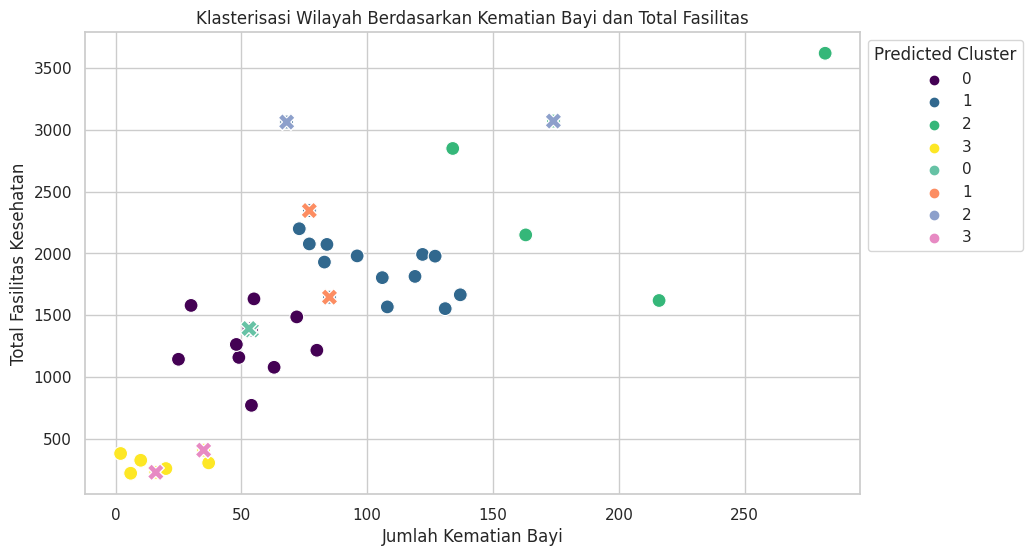

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jumlah Kematian Bayi', y='Total Fasilitas', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Klasterisasi Wilayah Berdasarkan Kematian Bayi dan Total Fasilitas')
plt.xlabel('Jumlah Kematian Bayi')
plt.ylabel('Total Fasilitas Kesehatan')

# Tambahkan plot untuk data uji
sns.scatterplot(x=X_test['Jumlah Kematian Bayi'], y=X_test['Total Fasilitas'], hue=y_pred, palette='Set2', s=150, marker='X')
plt.legend(title='Predicted Cluster', bbox_to_anchor=(1, 1))

plt.show()


In [45]:
# Menambahkan kolom 'Predicted Cluster' ke data uji
X_test['Predicted Cluster'] = knn_model.predict(X_test)

# Menampilkan data uji beserta hasil prediksi klaster
result_df = pd.DataFrame({
    'Kabupaten/Kota': X_test.index,
    'Jumlah Kematian Bayi': X_test['Jumlah Kematian Bayi'],
    'Total Fasilitas': X_test['Total Fasilitas'],
    'Predicted Cluster': X_test['Predicted Cluster']
})

print(result_df)


    Kabupaten/Kota  Jumlah Kematian Bayi  Total Fasilitas  Predicted Cluster
33              33                    35              407                  3
36              36                   174             3072                  2
4                4                    85             1646                  1
13              13                    77             2347                  1
30              30                    16              228                  3
26              26                    54             1380                  0
6                6                    68             3064                  2
27              27                    53             1392                  0
